In [1]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# memanggil dataset lewat gdrive
path = "/content/gdrive/My Drive/semester7/MachineLearning/praktikum_ml/praktikum06/"

In [4]:
# Import library pandas untuk membaca data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Membaca dataset Iris dari folder drive
df = pd.read_csv(path + "/data/Iris.csv")

# Menampilkan 5 data pertama untuk memastikan dataset berhasil dibaca
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [10]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Kolom target (label)
y = df['Species']

In [11]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Membuat model SVM dengan kernel linear
model = SVC(kernel='sigmoid')

model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [16]:
y_pred = model.predict(X_test)
# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
# Laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 30.00%

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        10
Iris-versicolor       0.30      1.00      0.46         9
 Iris-virginica       0.00      0.00      0.00        11

       accuracy                           0.30        30
      macro avg       0.10      0.33      0.15        30
   weighted avg       0.09      0.30      0.14        30



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix:
 [[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]


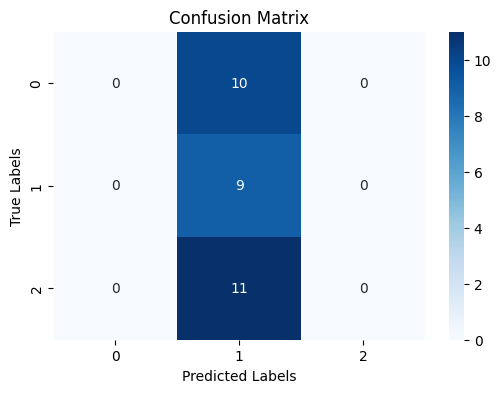

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Jika kamu tahu nama kelas (opsional, agar lebih informatif)
# misalnya: class_names = ['Negatif', 'Positif']
# maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

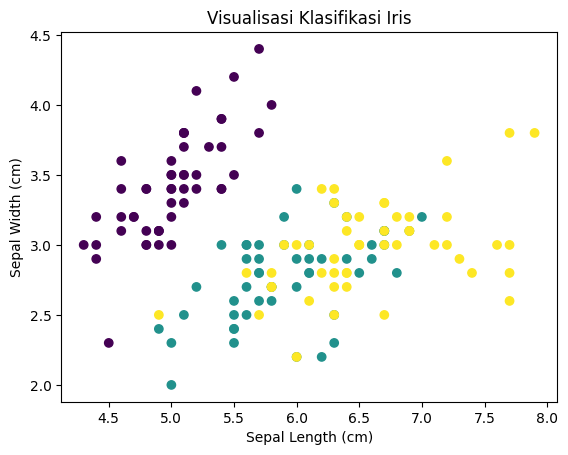

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visualisasi Klasifikasi Iris')
plt.show()

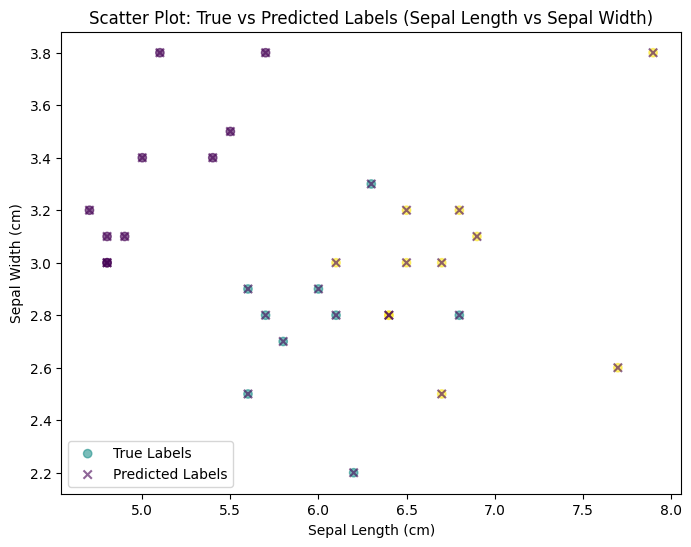

In [19]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Re-encode y_test for plotting
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)


plt.figure(figsize=(8, 6))

# Plot titik berdasarkan label asli
plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'],
            c=y_test_encoded, cmap='viridis', marker='o', label='True Labels', alpha=0.6)

# Plot titik berdasarkan label hasil prediksi
plt.scatter(X_test['SepalLengthCm'], X_test['SepalWidthCm'],
            c=y_pred_encoded, cmap='viridis', marker='x', label='Predicted Labels', alpha=0.6)

plt.title("Scatter Plot: True vs Predicted Labels (Sepal Length vs Sepal Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()

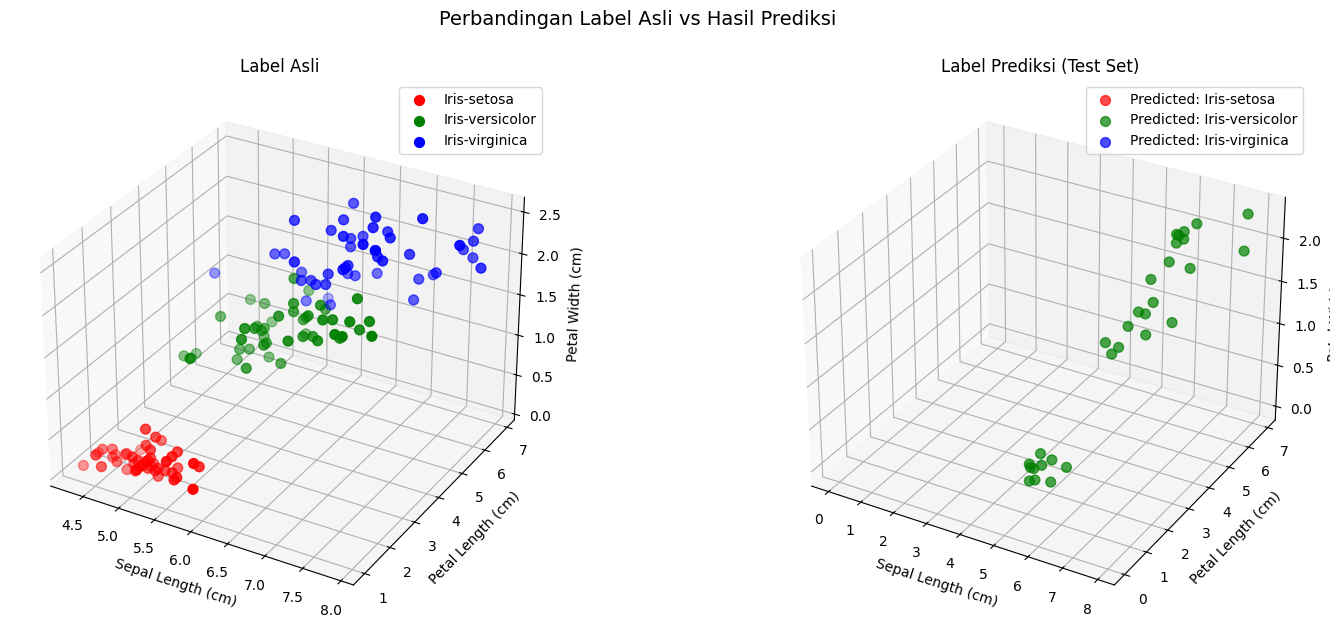

In [20]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3. Encode label (ubah teks jadi angka) - Moved from another cell
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_


fig = plt.figure(figsize=(18, 7))

# Plot 1: Label Asli
ax1 = fig.add_subplot(121, projection='3d')
for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax1.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        color=colors[i],
        label=species,
        s=50
    )
ax1.set_title('Label Asli')
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Petal Length (cm)')
ax1.set_zlabel('Petal Width (cm)')
ax1.legend()

# Plot 2: Label Prediksi
ax2 = fig.add_subplot(122, projection='3d')
# Tambahkan hasil prediksi ke DataFrame
# Create a new column and initialize with None
df['Predicted'] = None
# Assign predicted values to the rows that were in the test set
df.loc[X_test.index, 'Predicted'] = y_pred


# Visualisasi 3D berdasarkan hasil prediksi
# Warna untuk tiap kelas hasil prediksi
# Make sure to use the encoded predicted labels for coloring
# You might need to encode the 'Predicted' column if it's still in string format
if df['Predicted'].dtype == 'object':
    # Only encode the non-None values
    predicted_encoded = le.transform(df.loc[X_test.index, 'Predicted'])
    df.loc[X_test.index, 'PredictedEncoded'] = predicted_encoded
    plot_column = 'PredictedEncoded'
else:
    plot_column = 'Predicted'


# Plot tiap spesies dengan warna berbeda based on predicted label
# Use the original df and filter by the encoded predicted labels
for i, species_label in enumerate(labels):
    # Filter using the encoded predicted column and original index from X_test
    subset = df.loc[X_test.index].dropna(subset=[plot_column])
    subset = subset[subset[plot_column] == i]

    ax2.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        color=colors[i],
        label=f"Predicted: {species_label}",
        s=50,
        alpha=0.7
    )

ax2.set_xlabel('Sepal Length (cm)')
ax2.set_ylabel('Petal Length (cm)')
ax2.set_zlabel('Petal Width (cm)')
ax2.set_title('Label Prediksi (Test Set)')
ax2.legend()


plt.suptitle('Perbandingan Label Asli vs Hasil Prediksi', fontsize=14)
plt.show()

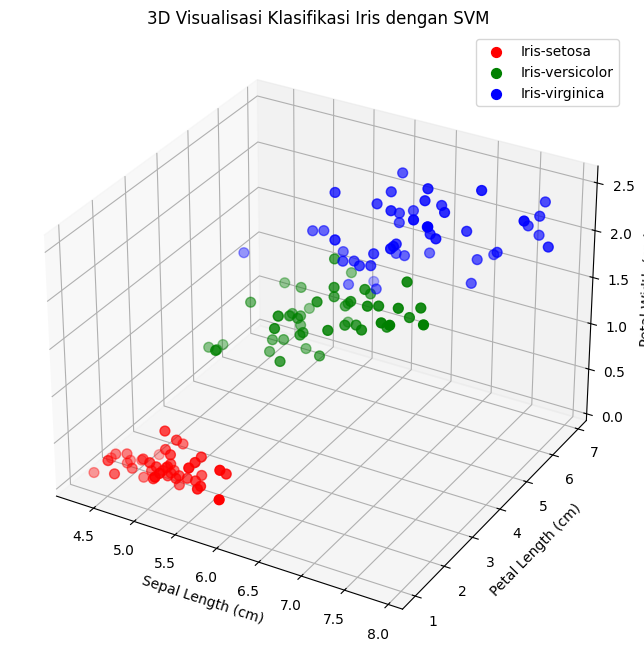

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])


# 8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        color=colors[i],
        label=species,
        s=50
    )

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')
ax.legend()
plt.show()